<h1 align="center">Digit Recognition Using Multi Layered Perceptrons</h1>
<h4 align="center">Author-Durvank Mahesh Gade</h4><br>
<b>Aim</b>: Digit recognition using MLPClassifier.<br><br>
<b>Packages and Libraries Used:</b><br>
1. Pandas<br>
2. Numpy<br>
3. Matplotlib<br>
4. Sklearn(scikit learn)<br>
<br>
Importing the packages:

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

Importing the Dataset:

In [2]:
X_train=pd.read_csv("Data/image_data_training_without_label.csv")
X_train.set_index(X_train["id"])
X_test=pd.read_csv("Data/image_data_test.csv")
X_test.set_index(X_test["id"])
Y_train=pd.read_csv("Data/training_label.csv")
Y_train.set_index(Y_train["id"])
Y_train=Y_train.drop("id",axis=1)
Y_test=pd.read_csv("Data/test_label.csv")
Y_test.set_index(Y_test["id"])
Y_test=Y_test.drop("id",axis=1)
Y_test=np.array(Y_test)
Y_test=Y_test.ravel()
#Since X_train and Y_train are too large, lets try reducing their size to reduce training time
l=[]

for i in range(3000):
    l+=[random.randint(0,60010)]
Xtf=pd.DataFrame(columns=X_train.columns)
Ytf=pd.DataFrame(columns=Y_train.columns)
for i in range(3000):
    Xtf.loc[i]=X_train.iloc[l[i]]
    Ytf.loc[i]=Y_train.iloc[l[i]]
Xtf=Xtf.drop("id",axis=1)

Now, lets look into the data:

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60010 entries, 0 to 60009
Columns: 786 entries, id to 784
dtypes: int64(786)
memory usage: 359.9 MB


Since X_train has 786 columns, with the first column being labeled as ‘id’, we can convert the DataFrame into a Numpy array. By excluding the ‘id’ and ‘784’ columns, we can reshape the array into 28x28 so that we can display examples as an image using Matplotlib.

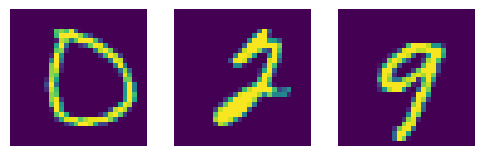

In [4]:
show=pd.DataFrame(columns=X_train.columns)
show.loc[0]=X_train.loc[3000] #Random index for visualization 
show.loc[1]=X_train.loc[15000] #Random index for visualization
show.loc[2]=X_train.loc[58000] #Random index for visualization
show=show.drop("id",axis=1)
show=show.drop("784",axis=1)
show=np.array(show).astype("float")
plt.figure(figsize=(6,6))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    plt.imshow(show[i].reshape(28,28))
    plt.axis("off")


Now lets optimize the parameters of MLP Classifier using <b>RandomizedSearchCV:</b>

In [5]:
parameters = {'hidden_layer_sizes':[64,128,256], 'alpha':[0.01,0.001,0.0001], 'max_iter': [200, 500, 800], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1] }
model = MLPClassifier()
abc=RandomizedSearchCV(estimator=model,param_distributions=parameters,cv=5)
#To remove warnings:
Ytf=np.array(Ytf)
Ytf=Ytf.ravel()

abc.fit(Xtf,Ytf)
print(f"Best parameters {abc.best_params_}" )

best_model=abc.best_estimator_#Selects the best model

Best parameters {'max_iter': 200, 'learning_rate_init': 0.001, 'hidden_layer_sizes': 256, 'alpha': 0.001}


The cross validation training was carried out with the help of <b>RandomizedSearchCV</b> from <b>sklearn.model_selection</b> . Now lets evaluate the performance of the model with the help of performance metrics. Here we are using <b>accuracy_score</b> from <b>sklearn.metrics</b> .

In [6]:
X_test.set_index("id")
X_test=X_test.drop("id",axis=1)
Y_pred=best_model.predict(X_test)
print(f"The accuracy score of the Best Model is : {accuracy_score(Y_pred, Y_test)}")

The accuracy score of the Best Model is : 0.893


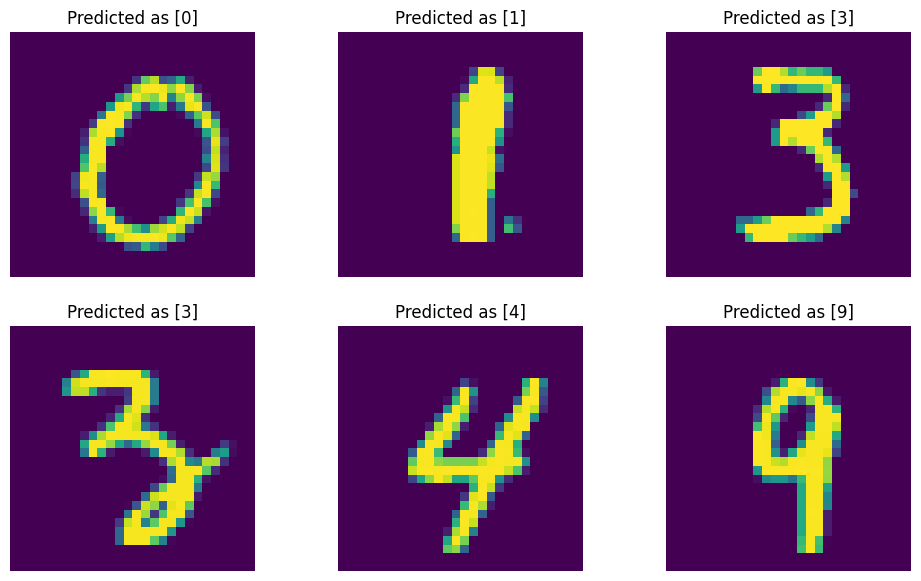

In [7]:
plt.figure(figsize=(12, 7))
plt.subplot(2, 3, 1)
sample_indices = [3, 2000, 3800, 4003, 4600, 9322]
for i, idx in enumerate(sample_indices, start=1):
    sample = pd.DataFrame(columns=X_test.columns)
    sample.loc[0] = X_test.loc[idx]
    pred = best_model.predict(sample)    
    plt.subplot(2, 3, i)
    sample=sample.drop("784",axis=1)
    plt.imshow(np.array(sample).reshape(28, 28))
    plt.title(f"Predicted as {pred}")
    plt.axis("off")
plt.show()


# **About me**
Hello! I'm <b>Durvank Gade</b>, a passionate <b>CSE AI ML</b> undergraduate student at VIT Chennai. With a background in <b>Data Science</b>, I thrive on solving complex problems and creating innovative solutions.
<br>
<br>
I'm deeply interested in <b>Data Science</b>, especially <b>Machine Learning</b>. Whether it's diving into machine learning algorithms or exploring data science, I'm always eager to learn and grow. My curiosity drives me to stay up-to-date with the latest trends and technologies.<br><br>
I'm always open to new opportunities, discussions and collaborations. Feel free to connect via:<br>
<b>Email</b>: <a>durvankgade@gmail.com</a><br>
<b>Phone/Whatsapp</b>: <a>9404763853<a><br>
<b>Linkedin<b>: <a>https://www.linkedin.com/in/durvank-gade-bb38a0276/</a>